2021 season

In [6]:
import pandas as pd

# Load the data from a CSV file
df = pd.read_csv('https://www.football-data.co.uk/mmz4281/2122/E0.csv')


2021 season

In [7]:
# Remove any rows with missing data
df.dropna(inplace=True)

# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Create a new column for the total goals scored in each match
df['Total Goals'] = df['FTHG'] + df['FTAG']

# Create a new column for the outcome of each match (win, lose, or draw)
df['Outcome'] = df.apply(lambda row: 'Win' if row['FTHG'] > row['FTAG'] else 'Lose' if row['FTHG'] < row['FTAG'] else 'Draw', axis=1)


In [8]:
# Calculate the average number of goals scored per match
avg_goals = df['Total Goals'].mean()

# Calculate the number of matches won by each team
wins = df['HomeTeam'][df['Outcome'] == 'Win'].value_counts() + df['AwayTeam'][df['Outcome'] == 'Lose'].value_counts()

# Calculate the number of matches drawn by each team
draws = df['HomeTeam'][df['Outcome'] == 'Draw'].value_counts() + df['AwayTeam'][df['Outcome'] == 'Draw'].value_counts()

# Calculate the number of matches lost by each team
losses = df['HomeTeam'][df['Outcome'] == 'Lose'].value_counts() + df['AwayTeam'][df['Outcome'] == 'Win'].value_counts()


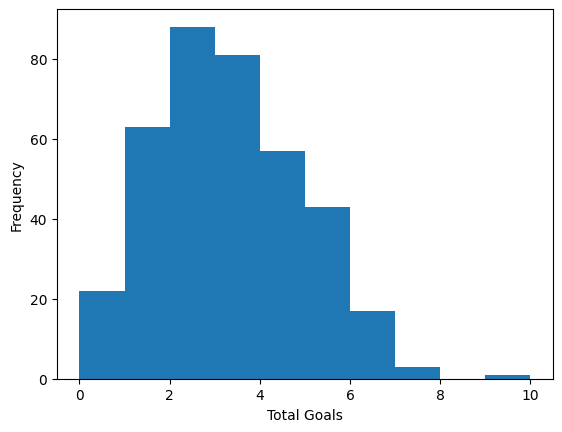

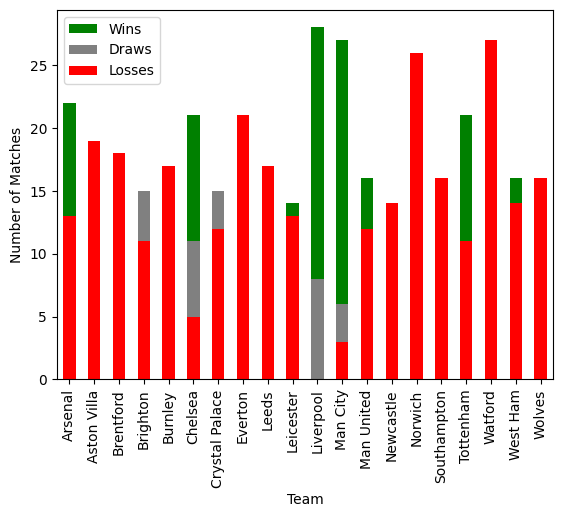

In [9]:
import matplotlib.pyplot as plt

# Plot a histogram of the total goals scored in each match
plt.hist(df['Total Goals'], bins=range(0, 11))
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()

# Plot a bar chart of the number of matches won, drawn, and lost by each team
wins.plot(kind='bar', color='green', label='Wins')
draws.plot(kind='bar', color='gray', label='Draws')
losses.plot(kind='bar', color='red', label='Losses')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.legend()
plt.show()


In [10]:
# Export the results to a CSV file
results = pd.concat([wins, draws, losses], axis=1, keys=['Wins', 'Draws', 'Losses'])
results.to_csv('premier_league_results.csv')
